In [1]:
#imports
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt

from layered_neural_net import lnn



In [2]:
#Run_hyperparameters
layers = [28*28,10,10]


In [3]:
#load dataset
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
#try on all classes
#one hot encode
def one_hot_encode(x):
    out = np.zeros((len(x), max(x)+1))
    for i in range(len(x)):
        out[i][x[i]] = 1
    return out

y_train_ohe = one_hot_encode(train_y)
y_test_ohe = one_hot_encode(test_y)
#flatten images
x_train = train_X.reshape(len(train_X), 28*28)
x_test = test_X.reshape(len(test_X), 28*28)

x_val = x_train[:10000]
y_val = y_train_ohe[:10000]

x_test = np.array_split(x_test, 10)
y_test_ohe = np.array_split(y_test_ohe, 10)




In [5]:

print(x_test[0].shape)
print(y_test_ohe[0].shape)

print(x_train.shape)
print(y_train_ohe.shape)


(1000, 784)
(1000, 10)
(60000, 784)
(60000, 10)


In [6]:
#setting up evolutionary pipeline
performance_over_time = []
#creating initial population
population_size = 30
def create_population(population_size):
    population = []
    print("Creating networks")
    for i in range(population_size):
        net = lnn(layers)
        population.append(net)
        print("|", end="")
    print("done!")
    return population


networks = create_population(population_size)

Creating networks
||||||||||||||||||||||||||||||done!


In [7]:
def get_perf(t):
        return t[0]

#measure performance of all the networks
def evaluate_performance(population, x, y):
    performances = []
    print("evaluating performances", end="")
    for net in population:
        predictions = net.predict(x)[0]
        correct_count = len(x)-(np.sum(np.abs(y - predictions))/2)
        performances.append((correct_count/len(x), net))
        #print(correct_count/len(x))
        print("|", end="")
    print(" done!", end=" ")
    #sort by best performance
    performances.sort(key = get_perf, reverse = True)
    return performances

evaluated_networks = evaluate_performance(networks, x_test[0], y_test_ohe[0])
print("best performer of this generation :", evaluated_networks[0][0])
performance_over_time.append(np.array(evaluated_networks)[:,0])

evaluating performances|||||||||||||||||||||||||||||| done! best performer of this generation : 0.164


In [8]:
#the n best performing networks will be selected
n = 3
mutation_range = 0.1

def repopulate(evaluated_networks, mutation_range, n):
    offspring_per_network = int(population_size/n)
    parents = [i[1] for i in evaluated_networks[:n]]
    offspring = []
    for net in parents:
        net_offspring = net.reproduce(min(offspring_per_network, population_size - len(offspring)), mutation_range)
        offspring.extend(net_offspring)
    next_gen = parents + offspring
    next_gen = next_gen[:population_size]
    return next_gen
    
next_generation = repopulate(evaluated_networks, mutation_range,n)

In [9]:
performance_over_time = []
validation_accuracy = []

In [10]:
test_sets_used = []
mutation_ranges = []
#weight_history = []

In [11]:
print(np.array(performance_over_time))
for i in performance_over_time:
    print(len(i))

[]


generation 1  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.164
average best of last 100 generations 0.164
evaluating performances| done! 

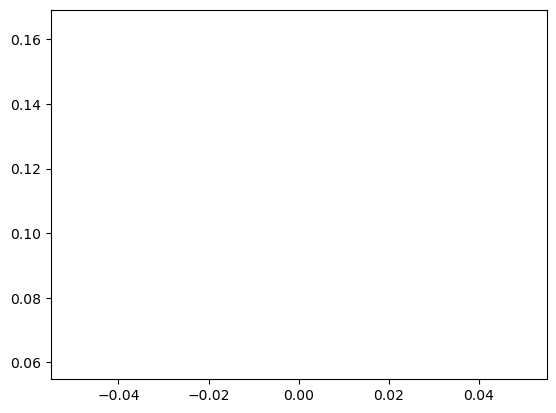

average best of last 100 generations 0.164


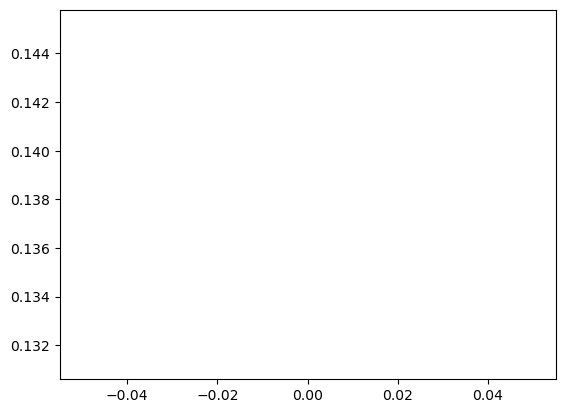

validation accuracy: 0.1382
generation 2  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.16
generation 3  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.156
generation 4  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.151
generation 5  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.134
generation 6  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.159
generation 7  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.178
generation 8  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.154
generation 9  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.164
generation 10  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.175
generation 11  test set: 8 evaluating performances|||||||||||||||||||||||||||||| 

generation 78  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.277
generation 79  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.266
generation 80  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.264
generation 81  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.27
average best of last 100 generations 0.21523456790123455
evaluating performances| done! generation 82  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.321
generation 83  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.268
generation 84  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.27
generation 85  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.277
generation 86  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.277
generation 87 

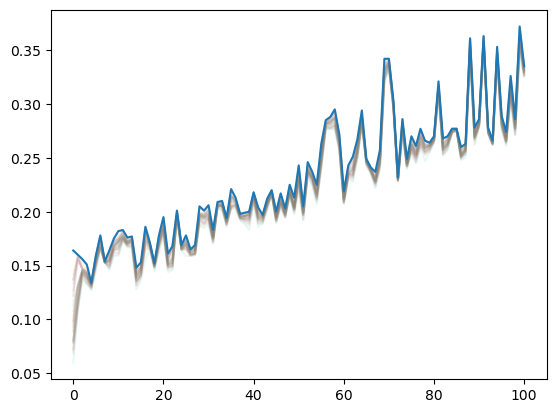

average best of last 100 generations 0.2327300000000001


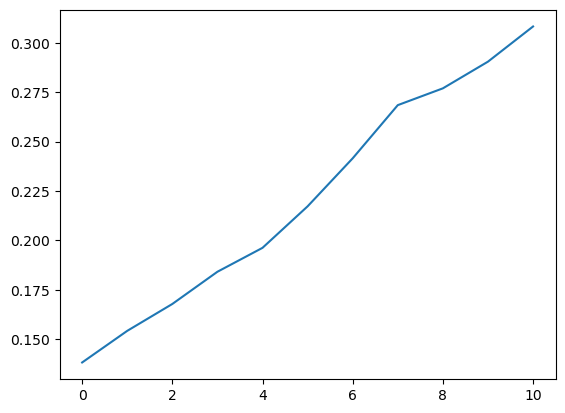

validation accuracy: 0.3082
generation 102  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.372
generation 103  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.36
generation 104  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.303
generation 105  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.304
generation 106  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.343
generation 107  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.309
generation 108  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.368
generation 109  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.35
generation 110  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.349
generation 111  test set: 8 evaluating performances||||||||||||||

generation 177  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.334
generation 178  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.43
generation 179  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.336
generation 180  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.43
generation 181  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.433
average best of last 100 generations 0.3333900000000001
evaluating performances| done! generation 182  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.427
generation 183  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.34
generation 184  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.348
generation 185  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.431
generat

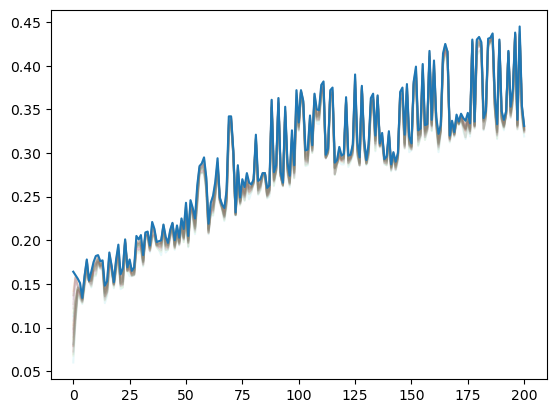

average best of last 100 generations 0.3496200000000001


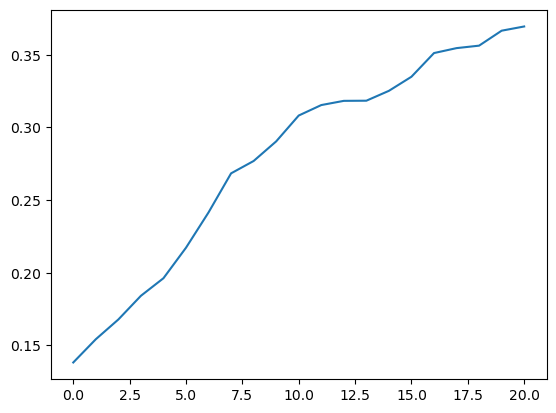

validation accuracy: 0.3695
generation 202  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.347
generation 203  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.34
generation 204  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.34
generation 205  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.343
generation 206  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.432
generation 207  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.449
generation 208  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.45
generation 209  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.44
generation 210  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.427
generation 211  test set: 9 evaluating performances||||||||||||||||

generation 277  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.454
generation 278  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.442
generation 279  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.45
generation 280  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.373
generation 281  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.361
average best of last 100 generations 0.3928799999999999
evaluating performances| done! generation 282  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.449
generation 283  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.484
generation 284  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.355
generation 285  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.464
gener

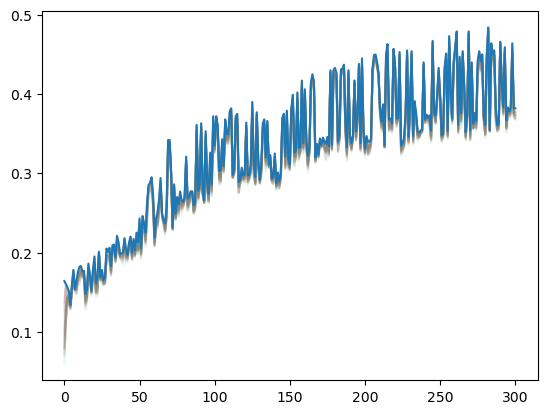

average best of last 100 generations 0.39889


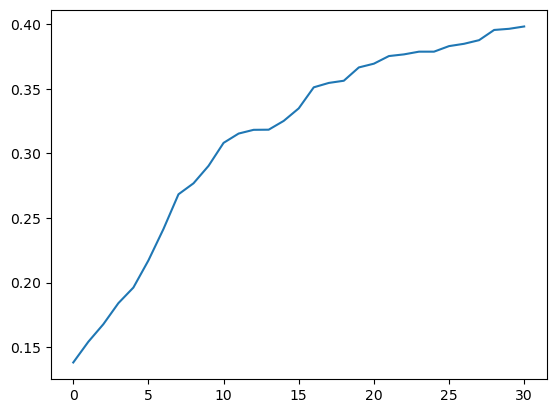

validation accuracy: 0.3983
generation 302  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.398
generation 303  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.424
generation 304  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.472
generation 305  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.424
generation 306  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.386
generation 307  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.387
generation 308  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.381
generation 309  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.4
generation 310  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.382
generation 311  test set: 1 evaluating performances||||||||||||||

generation 378  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.482
generation 379  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.402
generation 380  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.502
generation 381  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.437
average best of last 100 generations 0.42924000000000007
evaluating performances| done! generation 382  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.504
generation 383  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.491
generation 384  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.489
generation 385  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.402
generation 386  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.404
gen

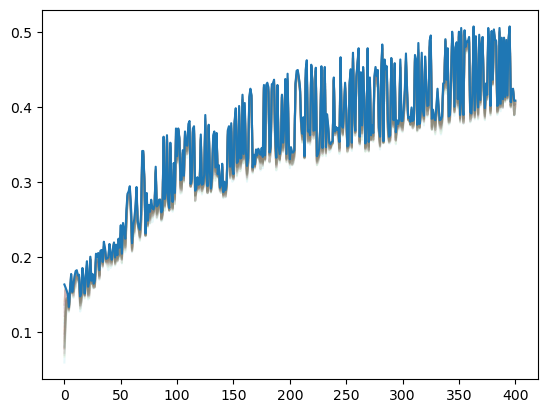

average best of last 100 generations 0.43689000000000006


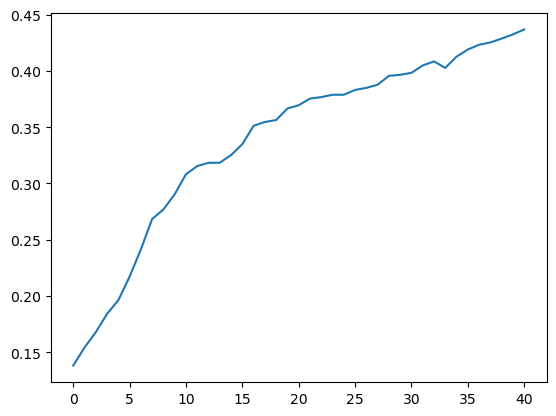

validation accuracy: 0.4368
generation 402  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.417
generation 403  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.516
generation 404  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.41
generation 405  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.516
generation 406  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.516
generation 407  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.415
generation 408  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.519
generation 409  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.424
generation 410  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.417
generation 411  test set: 9 evaluating performances|||||||||||||

generation 477  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.459
generation 478  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.443
generation 479  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.432
generation 480  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.51
generation 481  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.455
average best of last 100 generations 0.4656500000000001
evaluating performances| done! generation 482  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.433
generation 483  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.528
generation 484  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.408
generation 485  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.434
gener

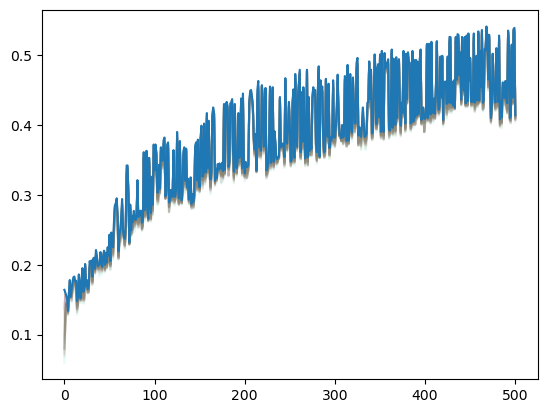

average best of last 100 generations 0.4678999999999999


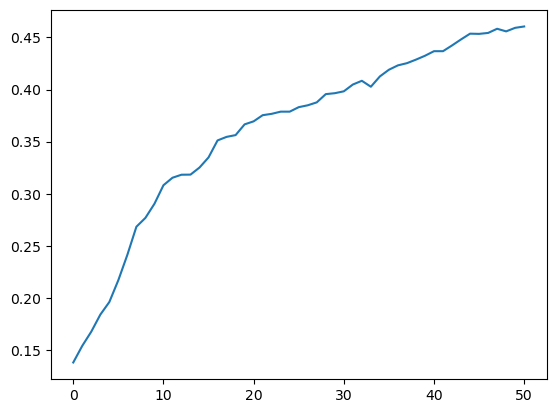

validation accuracy: 0.4605
generation 502  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.441
generation 503  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.437
generation 504  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.437
generation 505  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.433
generation 506  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.467
generation 507  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.542
generation 508  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.44
generation 509  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.441
generation 510  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.455
generation 511  test set: 0 evaluating performances|||||||||||||

generation 577  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.476
generation 578  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.476
generation 579  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.458
generation 580  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.533
generation 581  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.519
average best of last 100 generations 0.47424
evaluating performances| done! generation 582  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.468
generation 583  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.476
generation 584  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.432
generation 585  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.535
generation 586 

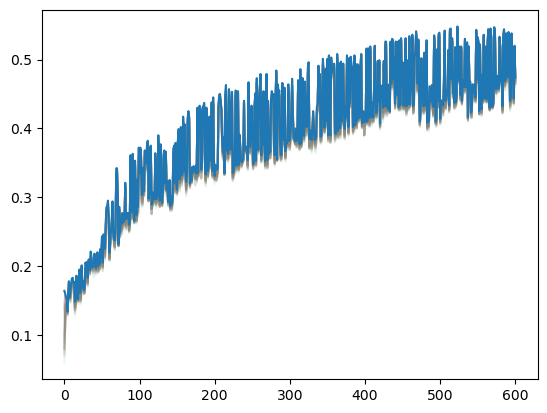

average best of last 100 generations 0.47957999999999984


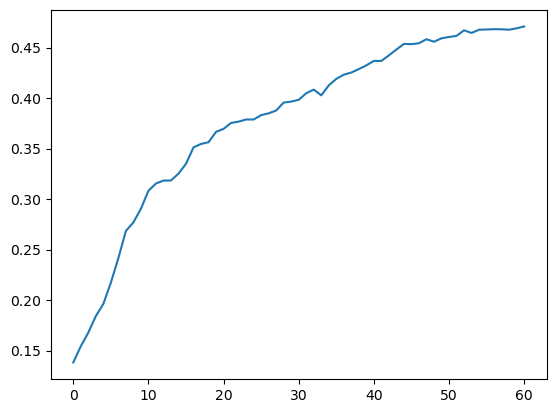

validation accuracy: 0.4709
generation 602  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.519
generation 603  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.475
generation 604  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.542
generation 605  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.477
generation 606  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.429
generation 607  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.478
generation 608  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.539
generation 609  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.478
generation 610  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.445
generation 611  test set: 7 evaluating performances||||||||||||

generation 677  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.546
generation 678  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.441
generation 679  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.526
generation 680  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.532
generation 681  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.445
average best of last 100 generations 0.49088
evaluating performances| done! generation 682  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.528
generation 683  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.533
generation 684  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.527
generation 685  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.464
generation 686 

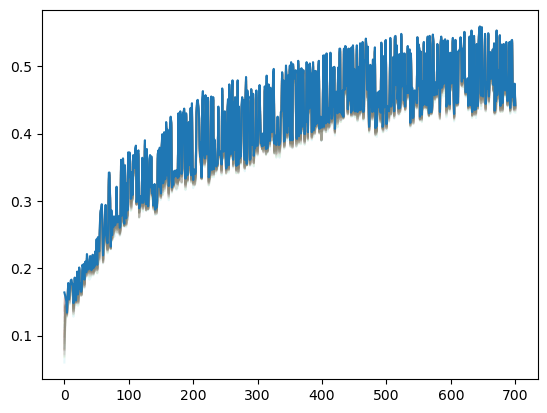

average best of last 100 generations 0.49035000000000006


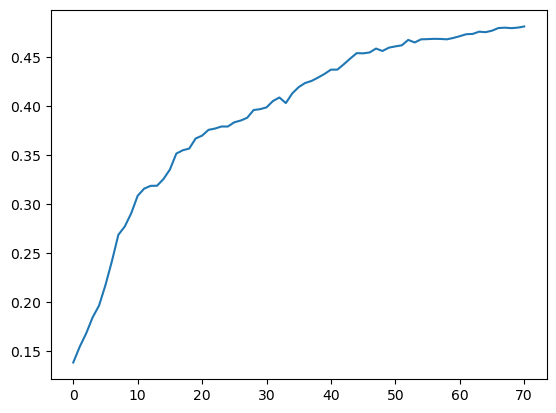

validation accuracy: 0.4808
generation 702  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.494
generation 703  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.473
generation 704  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.533
generation 705  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.555
generation 706  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.547
generation 707  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.461
generation 708  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.495
generation 709  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.45
generation 710  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.443
generation 711  test set: 6 evaluating performances|||||||||||||

generation 777  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.449
generation 778  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.48
generation 779  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.542
generation 780  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.543
generation 781  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.463
average best of last 100 generations 0.49822999999999984
evaluating performances| done! generation 782  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.48
generation 783  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.481
generation 784  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.491
generation 785  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.5
generat

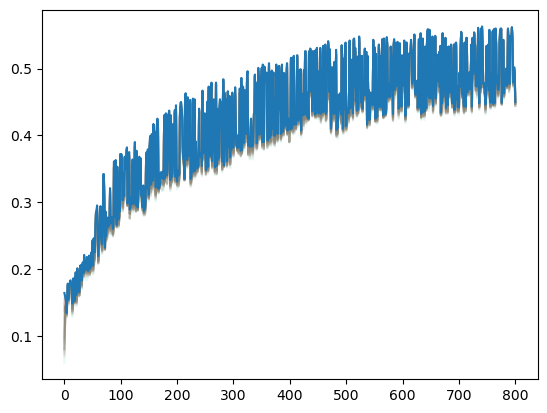

average best of last 100 generations 0.5025099999999999


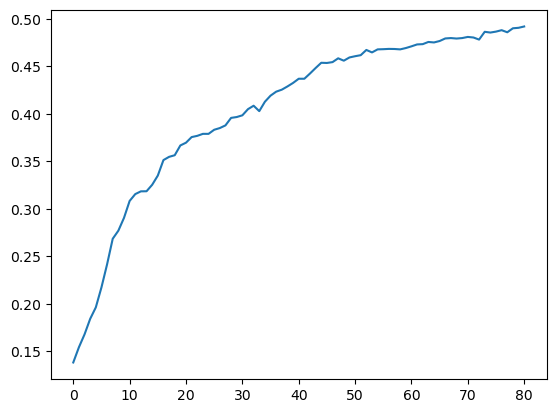

validation accuracy: 0.4918
generation 802  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.481
generation 803  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.468
generation 804  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.484
generation 805  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.484
generation 806  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.455
generation 807  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.485
generation 808  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.481
generation 809  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.503
generation 810  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.473
generation 811  test set: 3 evaluating performances||||||||||||

generation 878  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.541
generation 879  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.479
generation 880  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.489
generation 881  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.485
average best of last 100 generations 0.5141400000000002
evaluating performances| done! generation 882  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.487
generation 883  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.481
generation 884  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.56
generation 885  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.482
generation 886  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.547
gener

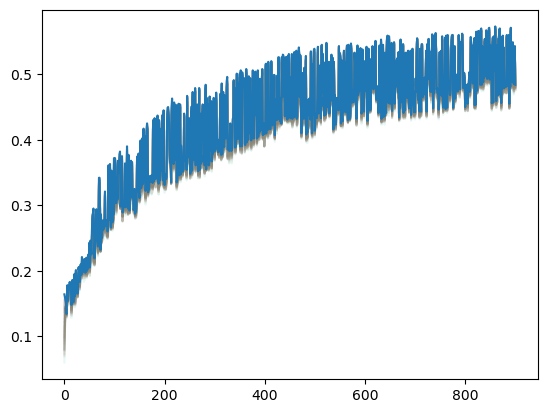

average best of last 100 generations 0.51497


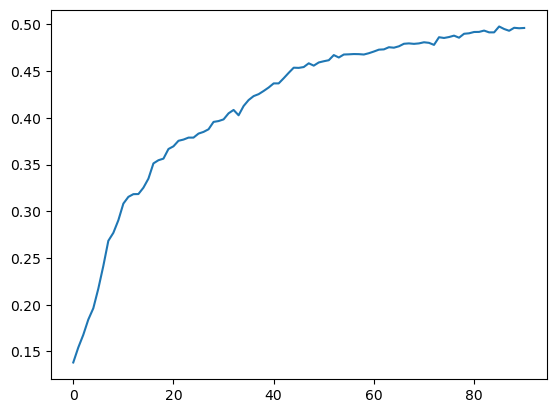

validation accuracy: 0.4961
generation 902  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.57
generation 903  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.573
generation 904  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.574
generation 905  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.468
generation 906  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.545
generation 907  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.546
generation 908  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.458
generation 909  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.557
generation 910  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.576
generation 911  test set: 9 evaluating performances|||||||||||||

generation 977  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.462
generation 978  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.55
generation 979  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.55
generation 980  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.578
generation 981  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.49
average best of last 100 generations 0.5127999999999999
evaluating performances| done! generation 982  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.56
generation 983  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.551
generation 984  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.516
generation 985  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.512
generati

In [12]:
true = True
import pickle
print_graphs = true
import gc

generations = 10000
test_set = 0

for gen in range(generations):
    print("generation " + str(len(performance_over_time) + 1), end=" ")
    if true and gen != 0:
        test_set = np.random.randint(10)
    print(" test set:", test_set, end=" ")
    if(gen%10==0):
        with open('backup/networks_lnn.pkl', 'wb') as f:
            pickle.dump(networks, f)
    networks = evaluate_performance(networks, x_test[test_set], y_test_ohe[test_set])
    if(gen%10==0):
        with open('lnn_run4_data/networks_lnn.pkl', 'wb') as f:
            pickle.dump(networks, f)
    
    print(" best:", networks[0][0])  # , "second:", evaluated_networks[1][0], "third:", evaluated_networks[2][0])
    performance_over_time.append(np.array(networks)[:, 0])
    test_sets_used.append(test_set)
    generational_mutation_range = mutation_range
    if true:  # change back
        generational_mutation_range = np.random.rand() * mutation_range
    mutation_ranges.append(generational_mutation_range)
    #print("mutating in range:", generational_mutation_range)
    #weight_history.append(networks[0][1].weights)
    next_gen = repopulate(networks, generational_mutation_range, 4)
    
    del networks
    networks = next_gen
    
    if (gen % 10 == 0) and print_graphs:
        print("average best of last 100 generations", np.average(np.array(performance_over_time)[-100:, 0]))
    gc.collect()
    if(gen%10==0):
        val_accuracy = evaluate_performance([networks[0]], x_val, y_val)[0][0]
        validation_accuracy.append(val_accuracy)
    if(gen%100==0):
        plt.plot(np.array(performance_over_time), alpha= 0.1)
        plt.plot(np.array(performance_over_time)[:,0])
        plt.show()
        print("average best of last 100 generations",np.average(np.array(performance_over_time)[-100:,0]))  
        plt.plot(validation_accuracy)
        plt.show()
        print("validation accuracy:", val_accuracy)
        with open('lnn_run4_data/performance_over_time_lnn.pkl', 'wb') as f:
            pickle.dump(performance_over_time, f)
        with open('lnn_run4_data/validation_accuracy.pkl', 'wb') as f:
            pickle.dump(validation_accuracy, f)
        with open('lnn_run4_data/test_sets_used.pkl', 'wb') as f:
            pickle.dump(test_sets_used, f)
    
    gc.collect()
    


1000
(784, 10)
(10, 10)


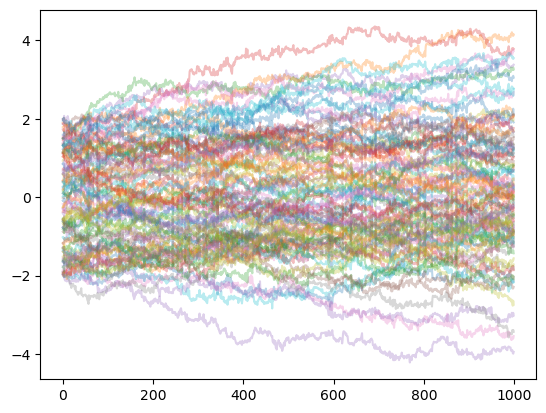

In [52]:
"""print(len(weight_history))
print(np.array(weight_history[0][0]).shape)
print(np.array(weight_history[0][1]).shape)
hist = np.array([i[1] for i in weight_history])
hist = hist.reshape(1000,100)
plt.plot(hist, alpha=0.3)
plt.show()"""

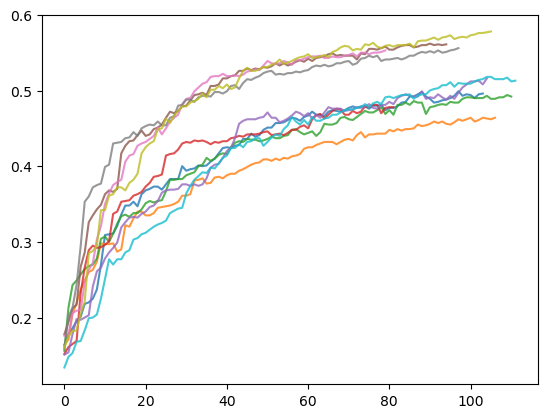

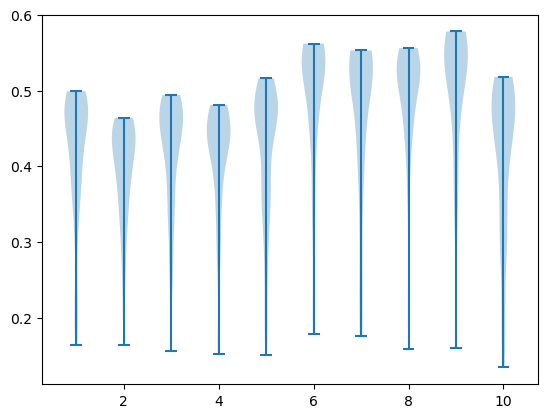

(1000,)
(999,)


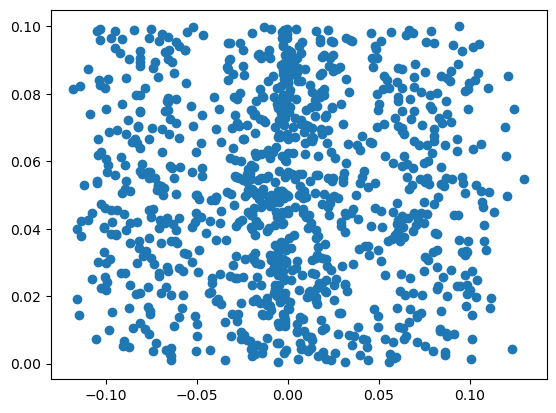

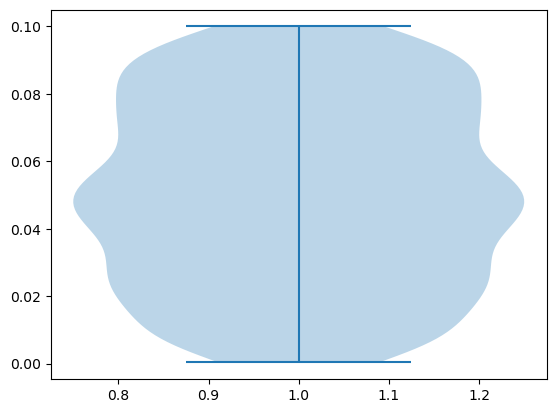

In [44]:
#visualising performance across the 10 different sets

performance_hist = np.array(performance_over_time)[-len(test_sets_used):,0]
set_perf = []
for i in range(10):
    set_perf.append([])

for i in range(len(test_sets_used)):
    set_perf[test_sets_used[i]].append(performance_hist[i])

for i in set_perf:
    plt.plot(i, alpha=0.8)
plt.show()

plt.violinplot(set_perf)
plt.show()

performance_hist = np.array(performance_over_time)[-len(test_sets_used):]
performance_changes = []
for i in range(len(performance_hist)-1):
    performance_changes.append(np.average(performance_hist[i])-np.average(performance_hist[i+1]))

print(np.array(mutation_ranges)[:len(mutation_ranges)].shape)
print(np.array(performance_changes)[:len(mutation_ranges)].shape)

plt.scatter(np.array(performance_changes)[:len(mutation_ranges)], np.array(mutation_ranges)[:len(performance_changes)])
plt.show()
plt.violinplot(np.array(mutation_ranges))
plt.show()

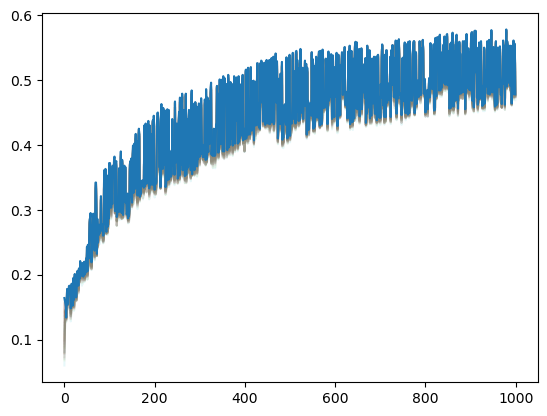

In [14]:
#TQDM -> loading bars

plt.plot(performance_over_time, alpha= 0.1)
plt.plot(np.array(performance_over_time)[:,0])
#plt.plot(list(0.99*np.ones(len(performance_over_time))))
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1000,) and (100,)

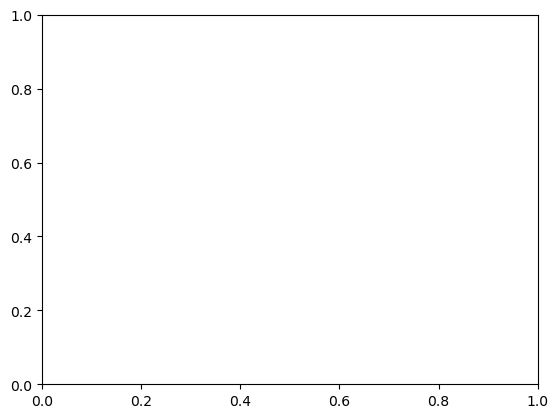

In [15]:

plt.plot(np.array(range(1000))*10,validation_accuracy)
plt.xlabel('Generations', fontsize=16, color='black', fontproperties=font)
plt.ylabel('Validation Accuracy', fontsize=16, color='black', fontproperties=font)
plt.savefig("lnn_validation_accuracy.pdf")
plt.show()

import matplotlib.font_manager as fm

# Assuming 'accuracy_over_time' is already defined
a = np.average(np.split(np.array(performance_over_time)[:6400,0], 100),axis=1)

# Create a larger figure
fig = plt.figure(figsize=(10, 6))

# Get the current axes, creating one if necessary.
ax = fig.gca()

# Set the background color of the plot to black
ax.set_facecolor('white')

# Create the plot with a line style and a bright blue color
plt.plot(average_performance, linestyle='-', color='blue', linewidth=2.0)

# Specify a font
font_path = '/Users/hannes/Library/Fonts/CenturyGothic.ttf'
font = fm.FontProperties(fname=font_path, size=16)

# Add title and labels with larger font sizes and black color
plt.title('Average Accuracy Over Time', fontsize=20, color='black', fontproperties=font)
plt.xlabel('Time', fontsize=16, color='black', fontproperties=font)
plt.ylabel('Average Accuracy', fontsize=16, color='black', fontproperties=font)

# Add a grid for easier visualization of values, with blue color
plt.grid(True, color='dodgerblue')

# Increase the size of the ticks for the x and y axes and make them black
plt.xticks(fontsize=14, color='black', fontproperties=font)
plt.yticks(fontsize=14, color='black', fontproperties=font)

# Add a legend with black font
plt.legend(['accuracy'], loc='upper left', fontsize=14, facecolor='black', edgecolor='dodgerblue', labelcolor='white')

# Set the color of the spines to blue
ax.spines[:].set_color('dodgerblue')

# Show the plot
plt.show()

In [ ]:
import matplotlib.font_manager
fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

for i in fonts:
    if "Gothic" in i:
        print(i)


In [ ]:
np.savetxt('training_run_'+str(training_run)+'_performance.csv', performance_over_time, delimiter=',')
np.savetxt('training_run_'+str(training_run)+'_test_sets_used.csv', test_sets_used, delimiter=',')
np.savetxt('training_run_'+str(training_run)+'_mutation_ranges.csv', mutation_ranges, delimiter=',')
np.save('training_run_'+str(training_run)+'_config.npy', np.array(log))

In [ ]:
print(max(performance_over_time[-1]))
print(validation_accuracy[-1])

In [ ]:

for i in range(10):
    plt.imshow(next_generation[0].weights[0].T[i].reshape((28,28)))
    plt.show()

In [ ]:
 plt.imshow(next_generation[0].weights[1])

In [ ]:
import pickle

In [ ]:
print(len(performance_over_time))

In [ ]:
def calculate_flops_matrix_multiplication_formula(n, p, m):
    # FLOPs for one element in the output matrix = 2p - 1
    flops_one_element = 2 * p - 1
    
    # Total FLOPs for the matrix multiplication
    total_flops = n * m * flops_one_element
    return total_flops


def fmm(n, p, m):
    return calculate_flops_matrix_multiplication_formula(n, p, m)

flops_nlnn_inf = 6*fmm(1,1944,1944)+6*1944
flops_gen_nlnn = flops_nlnn_inf * 1000 * 15
flops_run_nlnn = flops_gen_nlnn *10000
print("flops_run_nlnn:", flops_run_nlnn)

flops_lnn_inf = fmm(1,28*28,10)+10+fmm(1,10,10)+10
flops_gen_lnn = flops_lnn_inf * 1000 * 15
flops_run_lnn = flops_gen_lnn *10000
print("flops_run_lnn:", flops_run_lnn)


print("factor",flops_run_lnn/flops_run_nlnn, "or",flops_run_nlnn/flops_run_lnn )

In [ ]:
try:
    f = open('performance_over_time_nlnn.pkl', 'rb') 
    performance_over_time = pickle.load(f)
    print("previous performance loaded")
except:
    print("no previous performance found")